In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_HC.csv')

In [3]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,CAP PORTLAND,CONTENEDORES,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,9344631,...,10834.911700,0.00000,26714.341620,5818.061720,484.838477,4333.964679,327.861771,18317,37351.20649,37691.78854
1,HANSA AUGSBURG,CONTENEDORES,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,9373474,...,11815.677980,72652.90671,18711.021160,4537.753741,378.146145,4726.271190,327.861771,24270,101006.09900,101350.81510
2,HOHEBANK,CONTENEDORES,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,9435818,...,4270.957685,53297.42825,8989.314557,3499.295079,291.607923,1708.383074,327.861771,14882,67786.02888,68124.22588
3,ULTRA CORY,GRANEL,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,9675743,...,81570.305450,74674.34424,9074.873893,4322.585182,360.215432,32628.122180,85.529158,73647,121060.14090,121196.81390
4,MAERSK WAKAMATSU,CONTENEDORES,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,9550345,...,12813.363960,108664.30650,10406.430970,7695.122259,641.260188,5125.345586,327.861771,27704,132532.46550,132879.56670


In [4]:
df.columns

Index(['Motor_Ship', 'Type_of_Load', 'Docking_Day', 'Docking_Time',
       'Sailing_Day', 'Departure_Time', 'Permanence', 'Motor_Ship.1',
       'Year_of_Construct', 'IMO', 'Max_Speed', 'Avg_Speed', 'Gross_tonnage',
       'Dead_Weight', 'EM_Fuel', 'AE_Fuel', 'Engine_Speed', 'Power_ME',
       'LF_ME_Cruising', 'A_ME', 'Power_AE', 'LF_ME_Maniobra',
       'T_min_Hotell_Formato', 'T_min_Hotell', 'Energy_ME_Cruising',
       'Energy_ME_Maniobra', 'Energy_AE_Cruising', 'Energy_AE_Maniobra',
       'Energy_AE_Hotelling', 'ME_Cruising', 'ME_Maniobra', 'AE_Cruising',
       'AE_Maniobra', 'AE_Hotelling', 'Caldera_Maniobra', 'Caldera_Hotelling',
       'Subtotal_NoCald', 'Total'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Motor_Ship            651 non-null    object 
 1   Type_of_Load          651 non-null    object 
 2   Docking_Day           651 non-null    object 
 3   Docking_Time          651 non-null    object 
 4   Sailing_Day           651 non-null    object 
 5   Departure_Time        651 non-null    object 
 6   Permanence            651 non-null    object 
 7   Motor_Ship.1          651 non-null    object 
 8   Year_of_Construct     650 non-null    float64
 9   IMO                   608 non-null    object 
 10  Max_Speed             651 non-null    float64
 11  Avg_Speed             651 non-null    float64
 12  Gross_tonnage         651 non-null    int64  
 13  Dead_Weight           608 non-null    float64
 14  EM_Fuel               651 non-null    object 
 15  AE_Fuel               6

##Data Cleaning/Preprocessing

In [6]:
df.isna().sum()

Motor_Ship               0
Type_of_Load             0
Docking_Day              0
Docking_Time             0
Sailing_Day              0
Departure_Time           0
Permanence               0
Motor_Ship.1             0
Year_of_Construct        1
IMO                     43
Max_Speed                0
Avg_Speed                0
Gross_tonnage            0
Dead_Weight             43
EM_Fuel                  0
AE_Fuel                  0
Engine_Speed             0
Power_ME                 0
LF_ME_Cruising           1
A_ME                     0
Power_AE                 0
LF_ME_Maniobra           0
T_min_Hotell_Formato     0
T_min_Hotell             0
Energy_ME_Cruising       0
Energy_ME_Maniobra       0
Energy_AE_Cruising       0
Energy_AE_Maniobra       0
Energy_AE_Hotelling      0
ME_Cruising              0
ME_Maniobra              0
AE_Cruising              0
AE_Maniobra              0
AE_Hotelling             0
Caldera_Maniobra         0
Caldera_Hotelling        0
Subtotal_NoCald          0
T

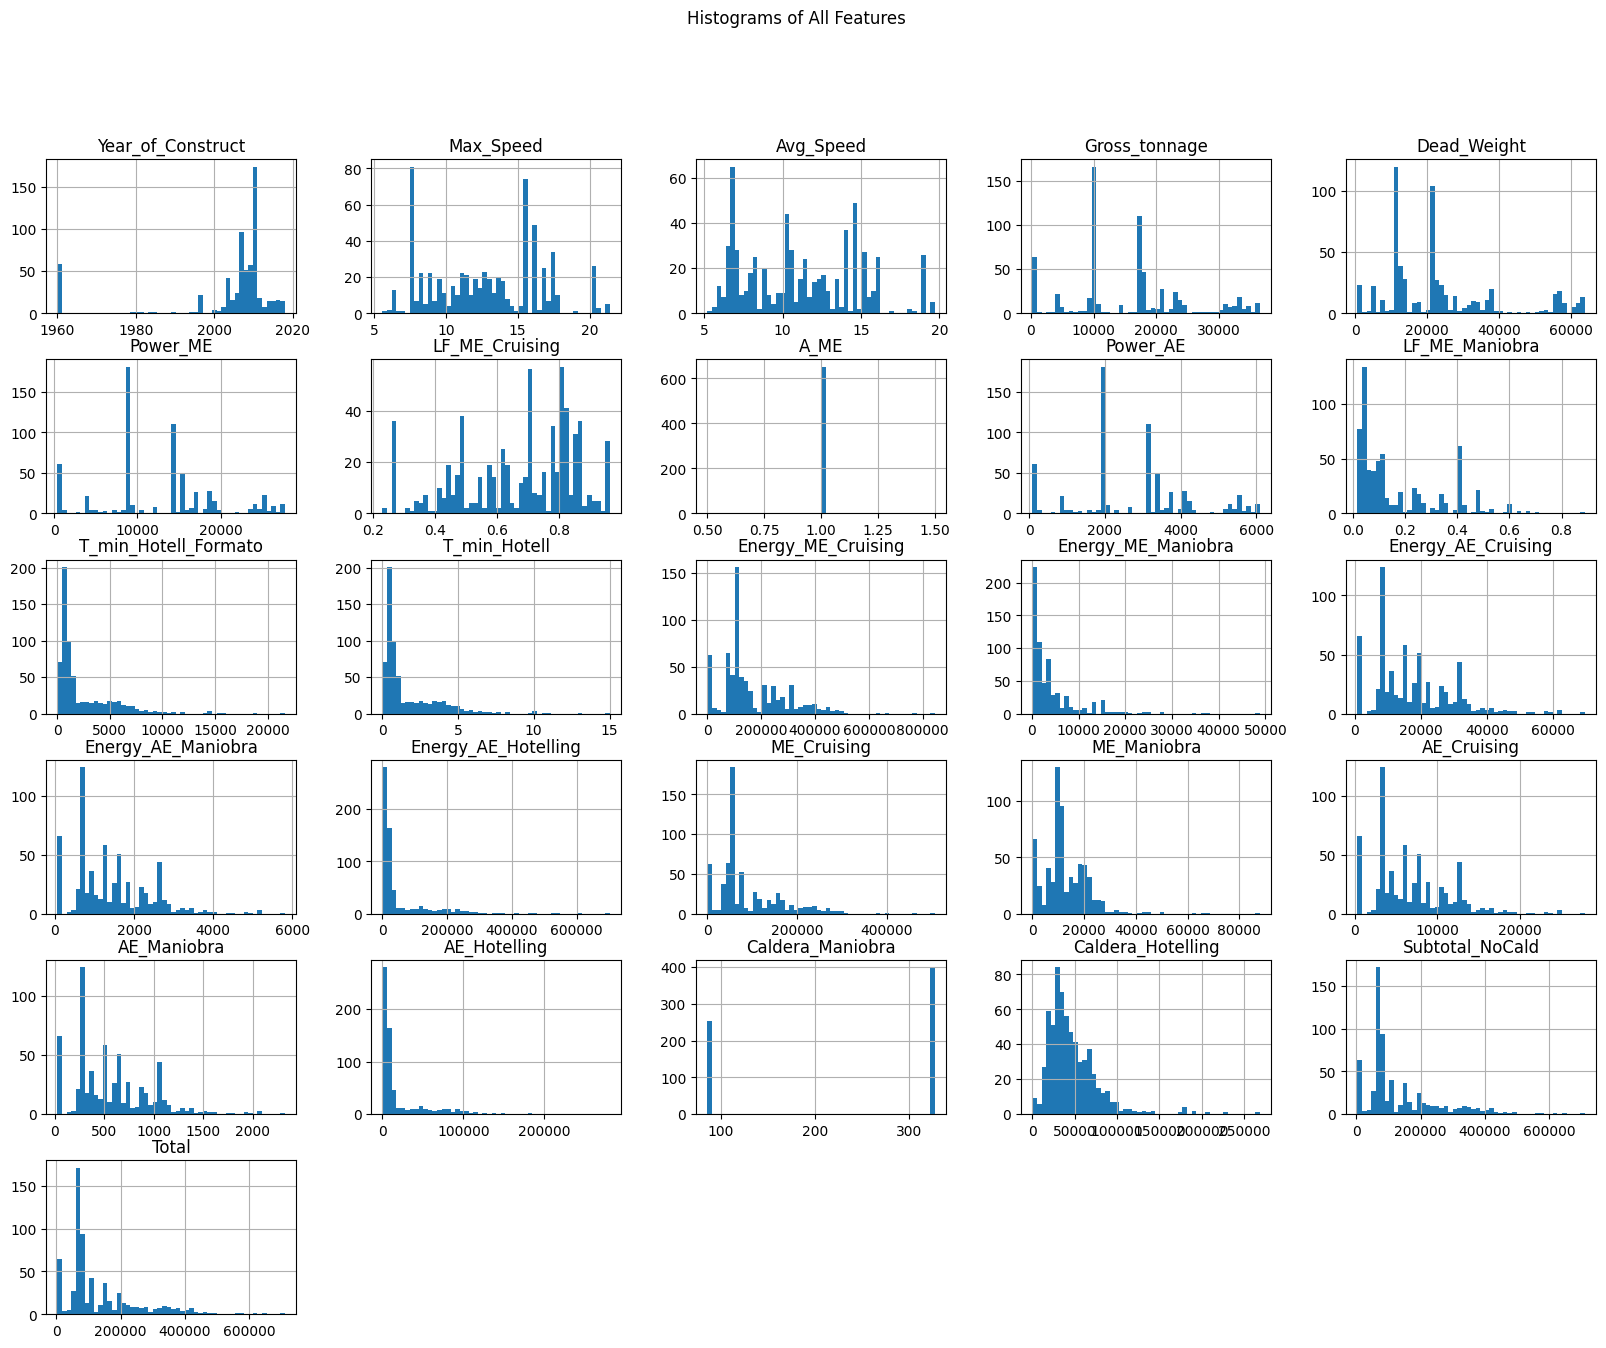

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
#data = pd.read_csv('path_to_your_dataset.csv')  # Adjust the path to your dataset

# Plot histograms for all columns
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of All Features')
plt.show()


In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# One-hot encoding for categorical variables
#df = pd.get_dummies(df, columns=categorical_cols)


In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding the target variable if present)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [10]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'.
df['Motor_Ship']= label_encoder.fit_transform(df['Motor_Ship'])
df['Type_of_Load']= label_encoder.fit_transform(df['Type_of_Load'])
df['EM_Fuel']= label_encoder.fit_transform(df['EM_Fuel'])
df['AE_Fuel']= label_encoder.fit_transform(df['AE_Fuel'])
df['Engine_Speed']= label_encoder.fit_transform(df['Engine_Speed'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Motor_Ship            651 non-null    int64  
 1   Type_of_Load          651 non-null    int64  
 2   Docking_Day           651 non-null    object 
 3   Docking_Time          651 non-null    object 
 4   Sailing_Day           651 non-null    object 
 5   Departure_Time        651 non-null    object 
 6   Permanence            651 non-null    object 
 7   Motor_Ship.1          651 non-null    object 
 8   Year_of_Construct     651 non-null    float64
 9   IMO                   608 non-null    object 
 10  Max_Speed             651 non-null    float64
 11  Avg_Speed             651 non-null    float64
 12  Gross_tonnage         651 non-null    float64
 13  Dead_Weight           651 non-null    float64
 14  EM_Fuel               651 non-null    int64  
 15  AE_Fuel               6

In [12]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,43,1,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,0.221382,9344631,...,-0.480851,-1.231470,1.459047,-0.225129,-0.225129,-0.480851,0.794690,-0.941548,-0.830263,-0.829967
1,91,1,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,0.289880,9373474,...,-0.470053,-0.248301,0.597953,-0.497548,-0.497548,-0.470053,0.794690,-0.748146,-0.280063,-0.279508
2,95,1,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,0.221382,9435818,...,-0.553120,-0.510227,-0.448025,-0.718506,-0.718506,-0.553120,0.794690,-1.053144,-0.567200,-0.566818
3,216,3,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,0.700867,9675743,...,0.297944,-0.220946,-0.438819,-0.543330,-0.543330,0.297944,-1.270531,0.856020,-0.106726,-0.107900
4,118,1,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,0.426875,9550345,...,-0.459069,0.239021,-0.295554,0.174263,0.174263,-0.459069,0.794690,-0.636582,-0.007565,-0.006879


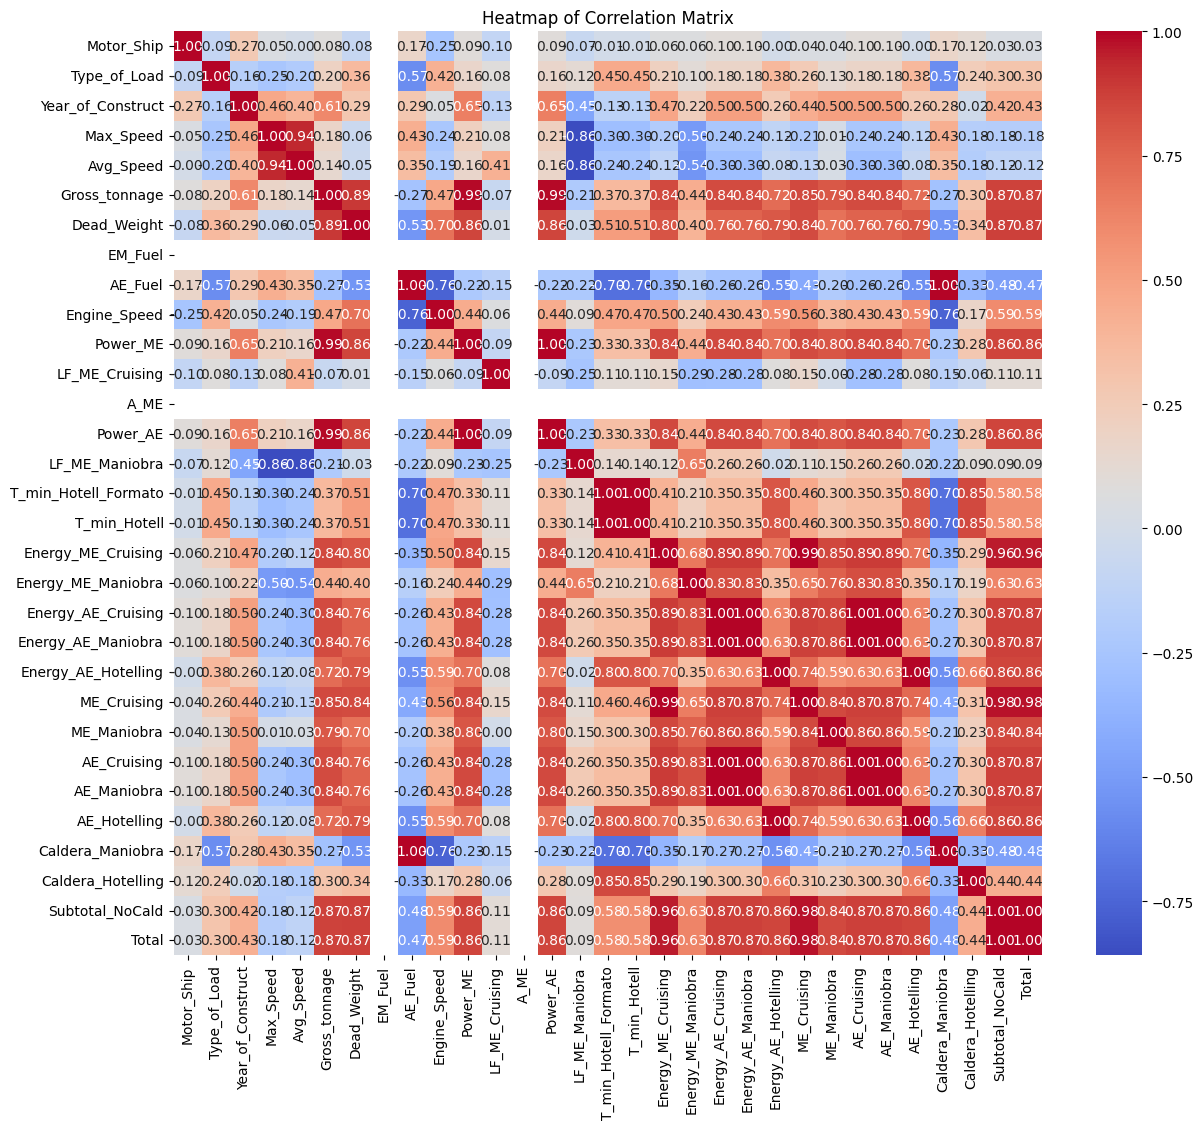

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Feature Selection

In [14]:
drop_col = ['Motor_Ship.1', 'Docking_Day', 'Docking_Time', 'IMO', 'Sailing_Day','Subtotal_NoCald', 'Departure_Time', 'Permanence', 'T_min_Hotell_Formato', 'T_min_Hotell', 'Caldera_Maniobra', 'Caldera_Hotelling', 'Subtotal_NoCald', 'ME_Cruising', 'ME_Maniobra', 'AE_Cruising', 'AE_Maniobra', 'AE_Hotelling', 'LF_ME_Maniobra', 'Energy_ME_Cruising', 'Energy_ME_Maniobra', 'Energy_AE_Cruising', 'Energy_AE_Maniobra', 'Energy_AE_Hotelling', 'Power_ME', 'Power_AE']
# Filter the drop_col list to include only columns that exist in the DataFrame
drop_col = [col for col in drop_col if col in df.columns]

# Drop the filtered columns
df.drop(labels=drop_col, axis=1, inplace=True)


In [15]:
#dropping the target variable
target_col = "Total"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [16]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,LF_ME_Cruising,A_ME,Total
0,43,1,0.221382,2.041844,1.920012,0.842712,0.320004,0,1,1,0.225221,0.0,-0.829967
1,91,1,0.289880,1.936915,2.195317,0.345378,0.010090,0,1,1,0.942204,0.0,-0.279508
2,95,1,0.221382,0.756464,0.956445,-0.557890,-0.743507,0,1,1,0.719303,0.0,-0.566818
3,216,3,0.700867,0.048193,0.213122,2.130772,2.490832,0,0,2,0.518121,0.0,-0.107900
4,118,1,0.426875,-0.266594,-0.117243,0.231860,-0.116509,0,1,1,0.402124,0.0,-0.006879


In [17]:
df.isna().sum()

Motor_Ship           0
Type_of_Load         0
Year_of_Construct    0
Max_Speed            0
Avg_Speed            0
Gross_tonnage        0
Dead_Weight          0
EM_Fuel              0
AE_Fuel              0
Engine_Speed         0
LF_ME_Cruising       0
A_ME                 0
Total                0
dtype: int64

In [18]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,LF_ME_Cruising,A_ME,Total
0,43,1,0.221382,2.041844,1.920012,0.842712,0.320004,0,1,1,0.225221,0.0,-0.829967
1,91,1,0.289880,1.936915,2.195317,0.345378,0.010090,0,1,1,0.942204,0.0,-0.279508
2,95,1,0.221382,0.756464,0.956445,-0.557890,-0.743507,0,1,1,0.719303,0.0,-0.566818
3,216,3,0.700867,0.048193,0.213122,2.130772,2.490832,0,0,2,0.518121,0.0,-0.107900
4,118,1,0.426875,-0.266594,-0.117243,0.231860,-0.116509,0,1,1,0.402124,0.0,-0.006879


Test/Train Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##Decison Tree


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test)
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)


# Print performance metrics
print(f"Decision Tree Regressor - MSE: {mse_dt}")
print(f"Decision Tree Regressor - RMSE: {rmse_dt}")
print(f"Decision Tree Regressor - R^2: {r2_dt}")


Decision Tree Regressor - MSE: 0.07982878057333735
Decision Tree Regressor - RMSE: 0.28253987430686195
Decision Tree Regressor - R^2: 0.9027841534809153


     Actual  Predicted
0 -0.438575  -0.441993
1  1.721245   1.834913
2 -0.586523  -0.559450
3  1.485277   1.644562
4 -0.414988  -0.533633
5 -0.512257  -0.479059
6  1.034832   1.790928
7  0.545220   0.544446
8  0.552961   0.544446
9 -0.564338  -0.550099


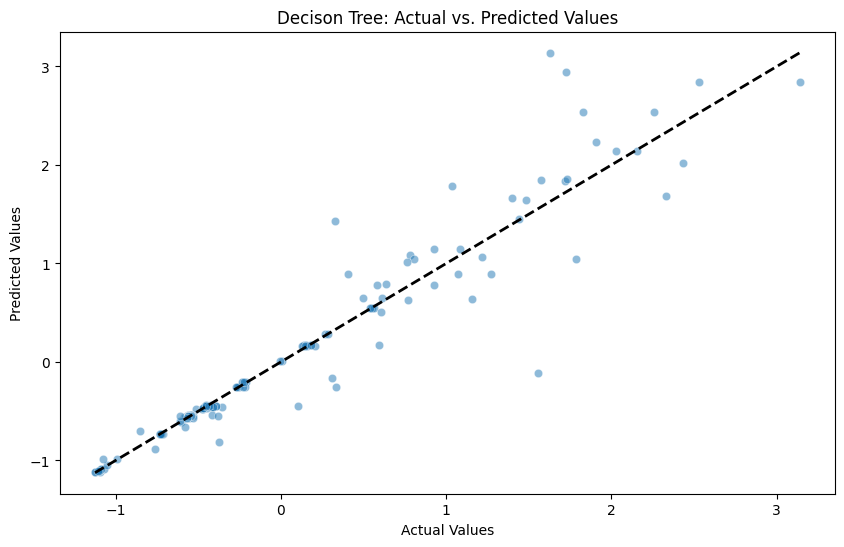

In [21]:
# Compare the actual values with the predicted values
comparison_dt_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
comparison_dt_rf.reset_index(drop=True, inplace=True)
print(comparison_dt_rf.head(10))
# visulize the predicted and actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_dt_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decison Tree: Actual vs. Predicted Values')
plt.show()

##Random Forest

In [23]:
#Random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print performance metrics
print(f"Random Forest Regressor - MSE: {mse_rf}")
print(f"Random Forest Regressor - RMSE: {rmse_rf}")
print(f"Random Forest Regressor - R^2: {r2_rf}")


Random Forest Regressor - MSE: 0.0419528800008006
Random Forest Regressor - RMSE: 0.2048240220306217
Random Forest Regressor - R^2: 0.948909594836607


     Actual  Predicted
0 -0.438575  -0.442762
1  1.721245   2.120777
2 -0.586523  -0.558372
3  1.485277   1.741713
4 -0.414988  -0.533390
5 -0.512257  -0.480828
6  1.034832   1.664768
7  0.545220   0.544591
8  0.552961   0.544591
9 -0.564338  -0.549965


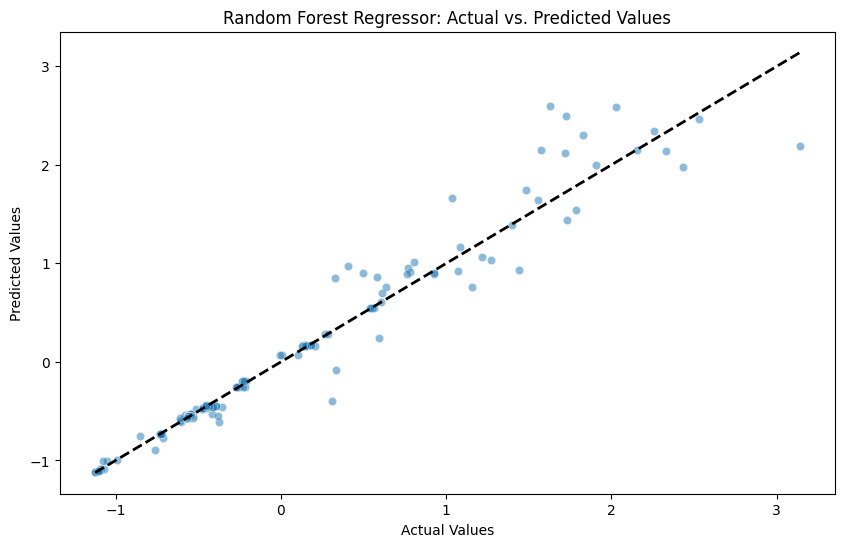

In [24]:
# Compare the actual values with the predicted values
comparison_df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_df_rf.reset_index(drop=True, inplace=True)
print(comparison_df_rf.head(10))
# visulize the predicted and actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs. Predicted Values')
plt.show()


In [25]:
#Feature Importance
# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Creating a DataFrame to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
features_df_10 = features_df.head(10)
print(features_df_10)


              Feature  Importance
6         Dead_Weight    0.709995
5       Gross_tonnage    0.158831
3           Max_Speed    0.068822
4           Avg_Speed    0.031452
10     LF_ME_Cruising    0.013869
0          Motor_Ship    0.008500
2   Year_of_Construct    0.005983
1        Type_of_Load    0.001990
9        Engine_Speed    0.000335
8             AE_Fuel    0.000224


##XG Boost

In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Initialize the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xg = xgb_model.predict(X_test)

# Evaluate the model
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f'Mean Squared Error of XG Boost (MSE): {mse_xg}')
print(f'Root Mean Squared Error (RMSE) of XG Boost: {rmse_xg}')
print(f'R-squared (R2) Score of XG Boost: {r2_xg}')

Mean Squared Error of XG Boost (MSE): 0.03928304904256893
Root Mean Squared Error (RMSE) of XG Boost: 0.19819951827027463
R-squared (R2) Score of XG Boost: 0.9521609269351714


In [252]:
#Feature Importance for XG Boost

feature_importances = xgb_model.feature_importances_

# Creating a DataFrame to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
features_df_10 = features_df.head(10)
print(features_df_10)

              Feature  Importance
6         Dead_Weight    0.728870
5       Gross_tonnage    0.155180
3           Max_Speed    0.051028
4           Avg_Speed    0.020739
10     LF_ME_Cruising    0.017341
0          Motor_Ship    0.006915
1        Type_of_Load    0.005735
2   Year_of_Construct    0.005537
9        Engine_Speed    0.004831
8             AE_Fuel    0.003823


     Actual  Predicted
0 -0.438575  -0.387672
1  1.721245   1.682421
2 -0.586523  -0.552548
3  1.485277   1.755818
4 -0.414988  -0.530273
5 -0.512257  -0.524285
6  1.034832   1.779036
7  0.545220   0.540310
8  0.552961   0.540310
9 -0.564338  -0.541560


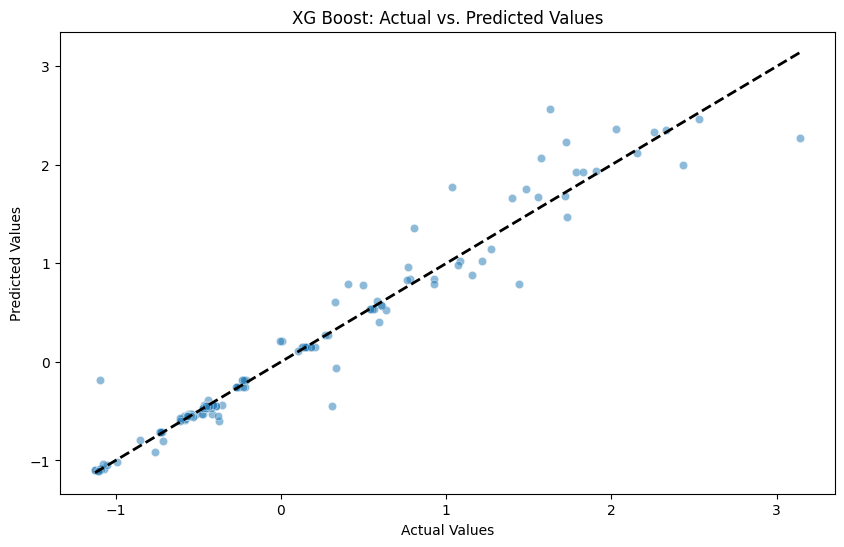

In [249]:
# Compare the actual values with the predicted values
comparison_xgb= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xg})
comparison_xgb.reset_index(drop=True, inplace=True)
print(comparison_xgb.head(10))
# visulize the predicted and actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XG Boost: Actual vs. Predicted Values')
plt.show()

Visualizing Key Parameters for all models

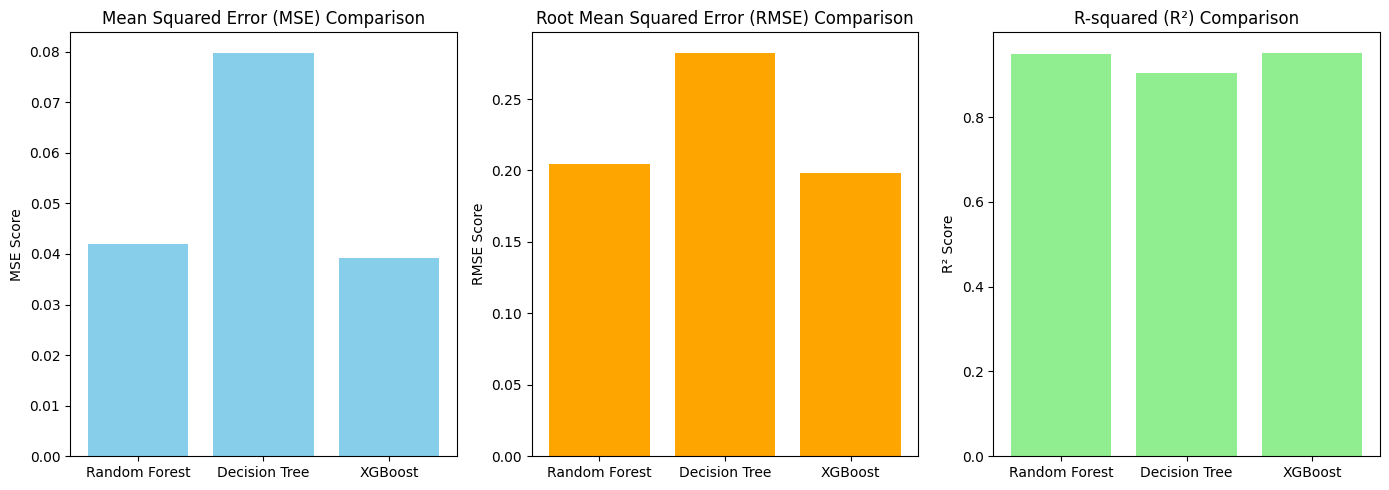

In [250]:
#comparing MSE , RMSE and R2 for 3 different models
import matplotlib.pyplot as plt


model_names = ['Random Forest', 'Decision Tree', 'XGBoost']
mse_scores = [mse_rf, mse_dt, mse_xg]
rmse_scores = [rmse_rf, rmse_dt, rmse_xg]
r2_scores = [r2_rf, r2_dt, r2_xg]

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# MSE Plot
ax[0].bar(model_names, mse_scores, color='skyblue')
ax[0].set_title('Mean Squared Error (MSE) Comparison')
ax[0].set_ylabel('MSE Score')

# RMSE Plot
ax[1].bar(model_names, rmse_scores, color='orange')
ax[1].set_title('Root Mean Squared Error (RMSE) Comparison')
ax[1].set_ylabel('RMSE Score')

# R2 Plot
ax[2].bar(model_names, r2_scores, color='lightgreen')
ax[2].set_title('R-squared (R²) Comparison')
ax[2].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

